In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ggplot import *

from probabinerator import Probabinerator

In [2]:
#try it with a different data set, for public release 
# info is here: http://statsmodels.sourceforge.net/devel/datasets/generated/modechoice.html

In [3]:
df = pd.read_csv("http://people.stern.nyu.edu/wgreene/Text/Edition7/TableF18-2.csv")

In [4]:
df.head()

,MODE,TTME,INVC,INVT,GC,HINC,PSIZE
0,0,69,59,100,70,35,1
1,0,34,31,372,71,35,1
2,0,35,25,417,70,35,1
3,1,0,10,180,30,35,1
4,0,64,58,68,68,30,2


In [5]:
features = ['TTME', 'INVC']

In [6]:
df['TTME'].value_counts()

0     210
53     94
35     87
69     77
34     77
64     75
44     70
30     27
45     19
15     17
10     16
40     11
60      9
20      9
25      8
50      7
5       7
75      6
90      5
55      2
99      2
16      1
80      1
85      1
2       1
1       1
Name: TTME, dtype: int64

In [7]:
df.sort_values(by='TTME', inplace=True)
prob = Probabinerator(df, features[0])
prob.count_index()
prob.invind

{1: [1, 2, 16, 85, 80],
 2: [99, 55],
 5: [90],
 6: [75],
 7: [5, 50],
 8: [25],
 9: [20, 60],
 11: [40],
 16: [10],
 17: [15],
 19: [45],
 27: [30],
 70: [44],
 75: [64],
 77: [69, 34],
 87: [35],
 94: [53],
 210: [0]}

In [8]:
count_target = sum(list(prob.invind.keys()))/3
count_target

247.0

In [9]:
kv_list = sorted(list(prob.invind.copy().items()), key=lambda x: x[1][0])
kv_list

[(210, [0]),
 (1, [1, 2, 16, 85, 80]),
 (7, [5, 50]),
 (16, [10]),
 (17, [15]),
 (9, [20, 60]),
 (8, [25]),
 (27, [30]),
 (87, [35]),
 (11, [40]),
 (70, [44]),
 (19, [45]),
 (94, [53]),
 (75, [64]),
 (77, [69, 34]),
 (6, [75]),
 (5, [90]),
 (2, [99, 55])]

In [10]:
prob.bin_combiner(toplot=True)
prob.newbins

{246: 64.0, 329: 16.0}

In [11]:
prob.bin_combiner()
prob.bin_ranges #missing 16 between 1 and 2; missing 55 between 2 and 3
#need some logic to check for adjusting the ranges
#probably need to keep track of which ones are being used, in order to find the ones that aren't

[[0, 35], [44, 90]]

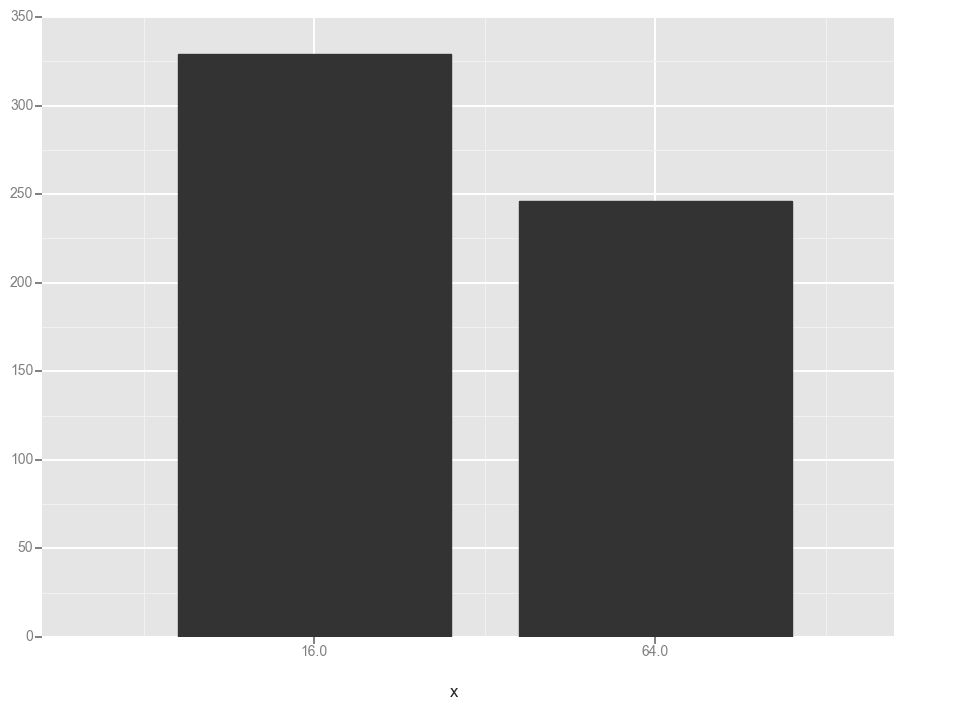

<ggplot: (272770859)>

In [12]:
prob.bin_combiner(toplot=True)
prob.plot_with_newbins()

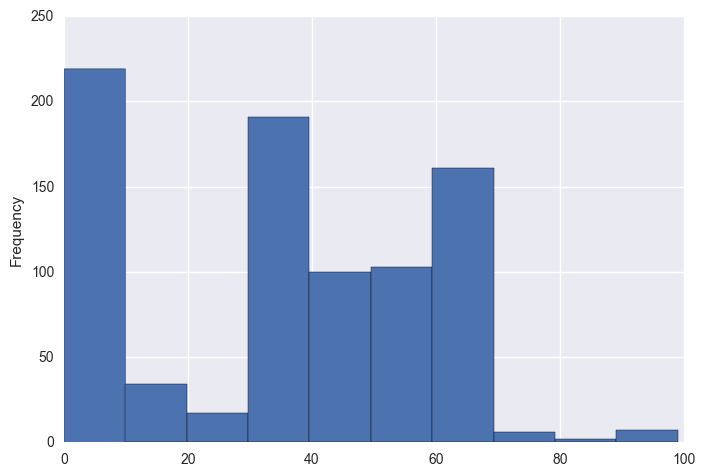

In [13]:
df['TTME'].plot(kind='hist', bins=10)

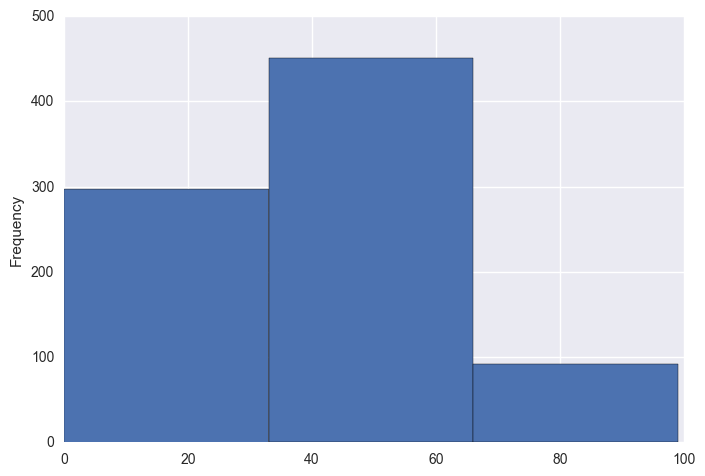

In [14]:
df['TTME'].plot(kind='hist', bins=3)

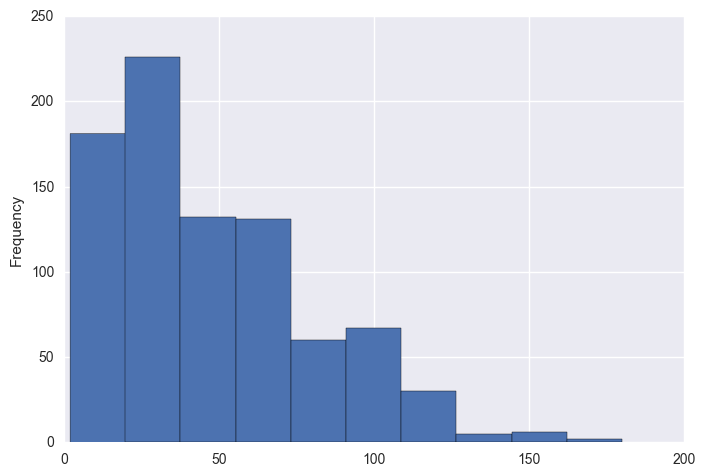

In [15]:
df['INVC'].plot(kind='hist', bins=10)

In [16]:
prob = Probabinerator(df, features[1])
prob.count_index()
prob.invind

{1: [2,
  3,
  55,
  63,
  68,
  79,
  80,
  95,
  99,
  101,
  106,
  114,
  117,
  118,
  119,
  124,
  125,
  126,
  127,
  129,
  138,
  142,
  143,
  145,
  147,
  148,
  152,
  165,
  180],
 2: [56, 77, 82, 83, 87, 97, 98, 100, 102, 112, 113, 115, 116, 120, 121, 151],
 3: [40, 41, 42, 53, 57, 72, 76, 78, 84, 86, 88, 93, 105, 109, 110],
 4: [65, 66, 73, 74, 85, 104],
 5: [6, 36, 51, 52, 69, 90, 92, 94, 96, 107, 111],
 6: [10, 20, 22, 23, 29, 37, 39, 49, 54, 62, 64, 67, 75, 81, 91],
 7: [4, 5, 9, 11, 27, 34, 48],
 8: [7, 8, 46],
 9: [28, 61, 71, 108],
 10: [15, 18, 47, 89, 103],
 11: [38],
 12: [16, 24, 50, 70],
 13: [12, 14, 21, 30, 45],
 14: [17, 60],
 15: [33, 43, 44],
 16: [19],
 17: [35],
 18: [26, 58],
 20: [32],
 24: [59],
 27: [25],
 33: [31],
 36: [13]}

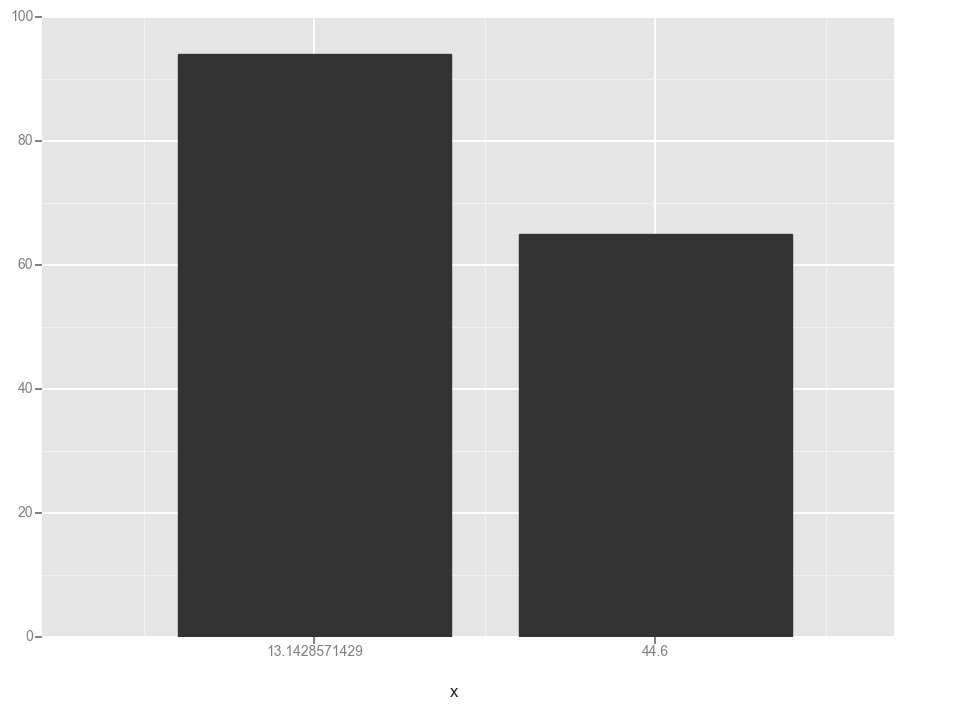

<ggplot: (-9223372036570876412)>

In [17]:
prob.bin_combiner(bins=4, toplot=True)
prob.plot_with_newbins()